# GROUP 1

## Introduction

Linear regression is utilized in business, science, and just about any other field where predictions and forecasting are relevant. It helps identify the relationships between a dependent variable and one or more independent variables. 
Forecasting is a tool used for predicting future demand based on past demand information.
The project is based on predicting sales based on the past budget given on TV, radi and newspaper advertisiment using regression model. A simple linear regression model and a multivariate regression model are used to forecast the sales.


 Import the required libraries and dataset.

In [53]:
# import directories
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn
import warnings
warnings.filterwarnings('ignore')

In [55]:
df=pd.read_csv('sales.csv')

In [56]:
df.head(6)

,Unnamed: 0,TV Ad Budget ($),Radio Ad Budget ($),Newspaper Ad Budget ($),Sales ($)
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9
5,6,8.7,48.9,75.0,7.2


In [57]:
df.describe(include='all')

,Unnamed: 0,TV Ad Budget ($),Radio Ad Budget ($),Newspaper Ad Budget ($),Sales ($)
count,200.000000,200.000000,200.000000,200.000000,200.000000
mean,100.500000,147.042500,23.264000,30.554000,14.022500
std,57.879185,85.854236,14.846809,21.778621,5.217457
min,1.000000,0.700000,0.000000,0.300000,1.600000
25%,50.750000,74.375000,9.975000,12.750000,10.375000
50%,100.500000,149.750000,22.900000,25.750000,12.900000
75%,150.250000,218.825000,36.525000,45.100000,17.400000
max,200.000000,296.400000,49.600000,114.000000,27.000000


In [58]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Unnamed: 0               200 non-null    int64  
 1   TV Ad Budget ($)         200 non-null    float64
 2   Radio Ad Budget ($)      200 non-null    float64
 3   Newspaper Ad Budget ($)  200 non-null    float64
 4   Sales ($)                200 non-null    float64
dtypes: float64(4), int64(1)
memory usage: 7.9 KB


In [59]:
print("Shape:" ,df.shape )
print(df.ndim)
print(df.size)

Shape: (200, 5)
2
1000


In [60]:
pd.DataFrame(df.isnull().sum(),columns =["Count of Null Values"]).T

,Unnamed: 0,TV Ad Budget ($),Radio Ad Budget ($),Newspaper Ad Budget ($),Sales ($)
Count of Null Values,0,0,0,0,0


Exploratory Data Analysis (EDA).

<AxesSubplot:xlabel='Newspaper Ad Budget ($)', ylabel='Sales ($)'>

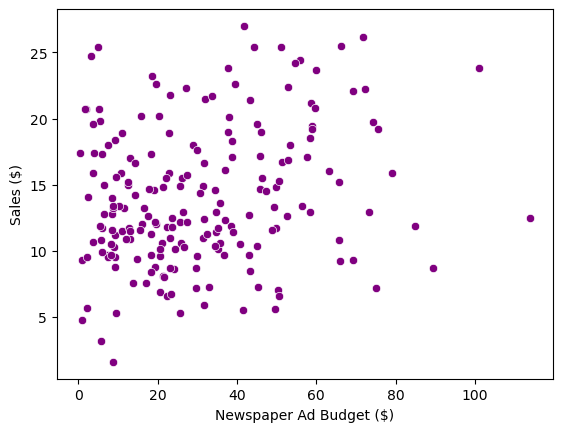

In [61]:
a = df["Newspaper Ad Budget ($)"]
b = df["Sales ($)"]
sns.scatterplot(x=a,y=b,color='purple')

<AxesSubplot:xlabel='TV Ad Budget ($)', ylabel='Radio Ad Budget ($)'>

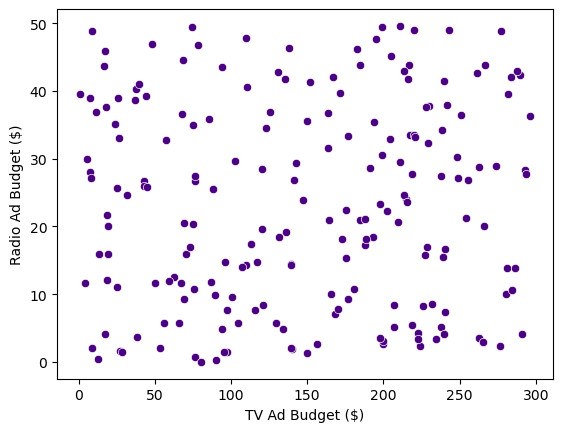

In [62]:
a = df["TV Ad Budget ($)"]
b = df["Radio Ad Budget ($)"]
sns.scatterplot(x=a,y=b,color='indigo')

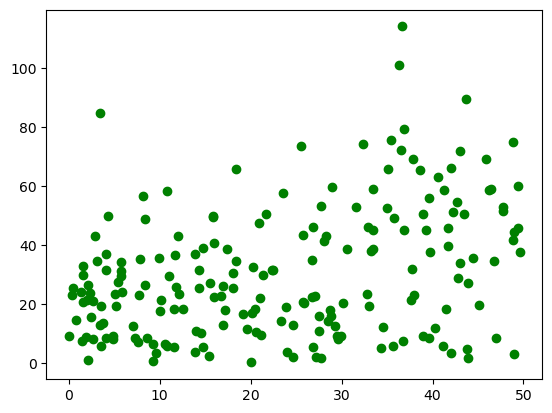

In [63]:
a = df["Radio Ad Budget ($)"]
b = df["Newspaper Ad Budget ($)"]
plt.scatter(x=a,y=b,color='green')

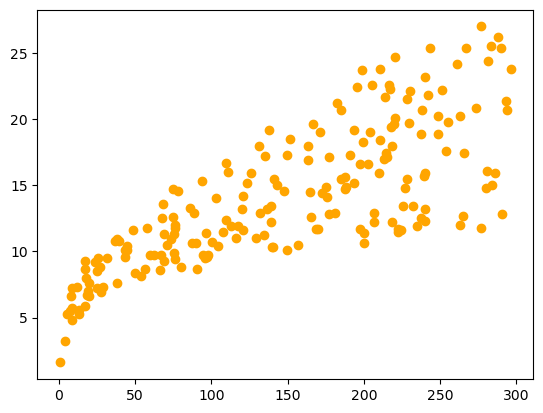

In [64]:
a = df["TV Ad Budget ($)"]
b = df["Sales ($)"]
plt.scatter(a,b,color='orange')

<AxesSubplot:xlabel='Radio Ad Budget ($)', ylabel='Sales ($)'>

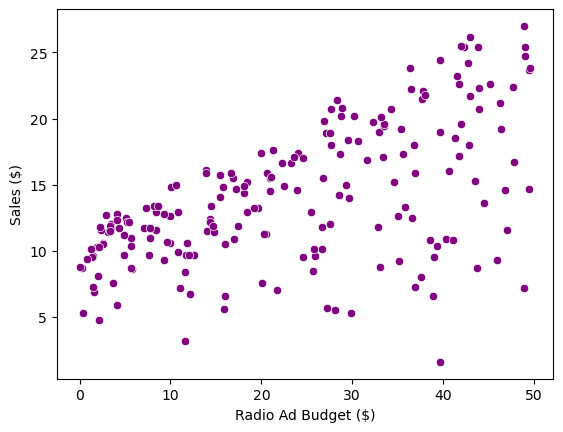

In [65]:
a = df["Radio Ad Budget ($)"]
b = df["Sales ($)"]
sns.scatterplot(x=a,y=b,color='purple')

<AxesSubplot:xlabel='TV Ad Budget ($)', ylabel='Density'>

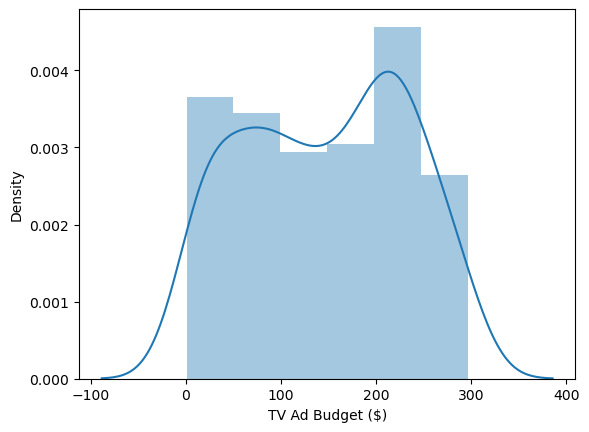

In [66]:
sns.distplot(df['TV Ad Budget ($)'])

<AxesSubplot:xlabel='Radio Ad Budget ($)', ylabel='Density'>

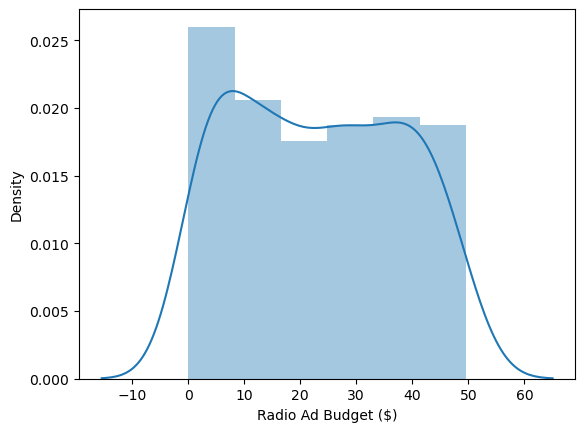

In [67]:
sns.distplot(df['Radio Ad Budget ($)'])

<AxesSubplot:xlabel='Newspaper Ad Budget ($)', ylabel='Density'>

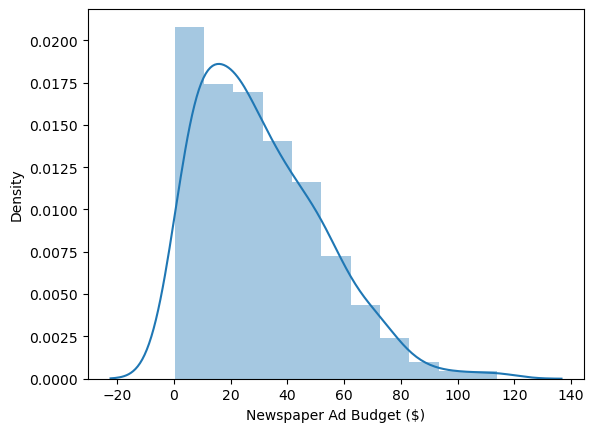

In [68]:
sns.distplot(df['Newspaper Ad Budget ($)'])

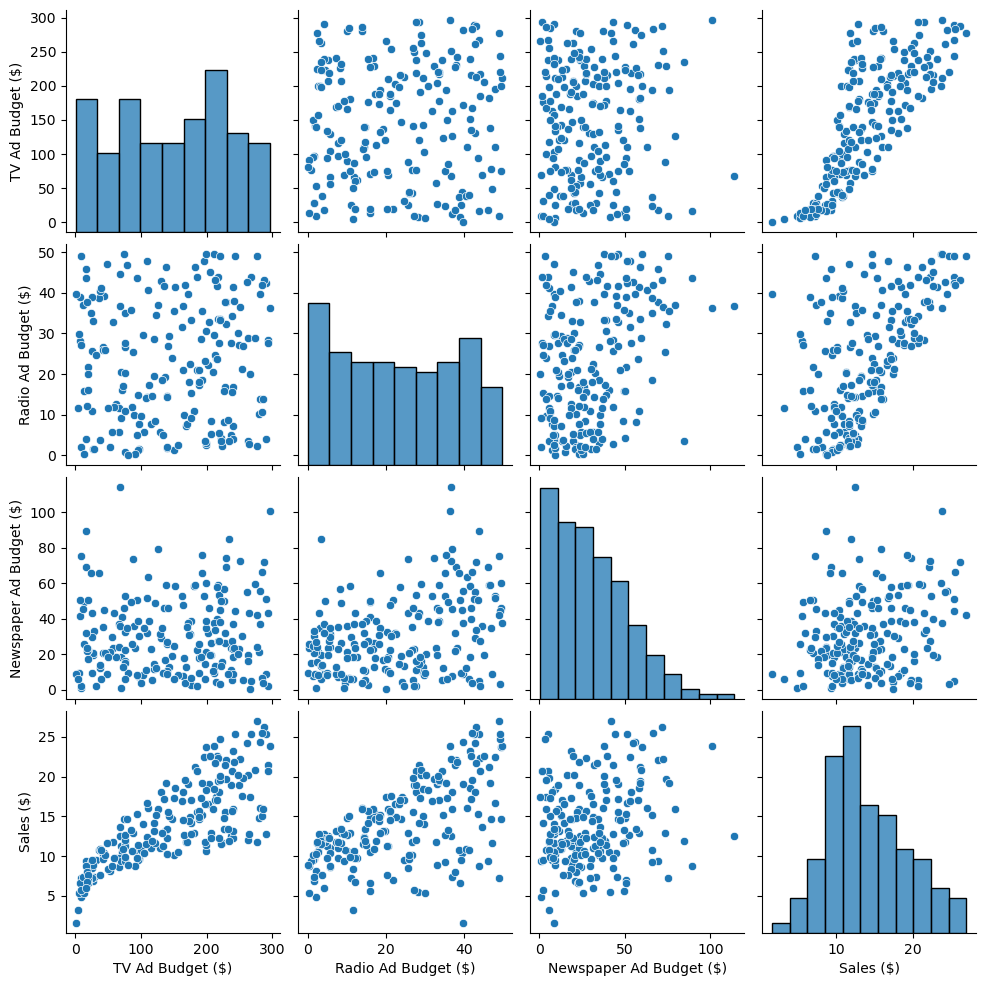

In [69]:
df.drop(df.columns[[0]], axis=1, inplace=True)
sns.pairplot(df)

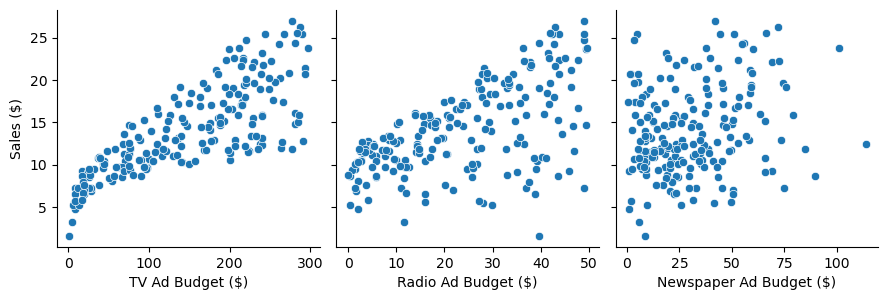

In [70]:
sns.pairplot(df,x_vars=['TV Ad Budget ($)','Radio Ad Budget ($)','Newspaper Ad Budget ($)'],y_vars=['Sales ($)'],height=3,aspect=1)
plt.show()

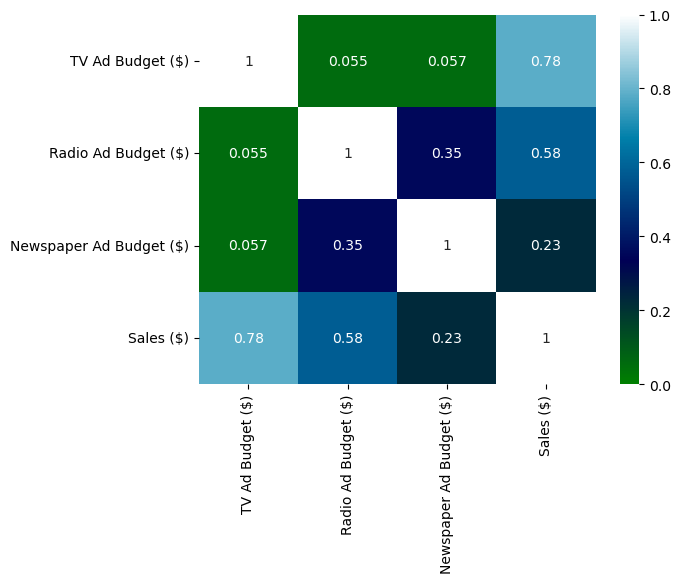

In [71]:
sns.heatmap(df.corr(),annot=True,vmin=0,vmax=1,cmap='ocean')
plt.show()

Statistical Tasks

In [72]:
df.corr()

,TV Ad Budget ($),Radio Ad Budget ($),Newspaper Ad Budget ($),Sales ($)
TV Ad Budget ($),1.000000,0.054809,0.056648,0.782224
Radio Ad Budget ($),0.054809,1.000000,0.354104,0.576223
Newspaper Ad Budget ($),0.056648,0.354104,1.000000,0.228299
Sales ($),0.782224,0.576223,0.228299,1.000000


In [73]:
df.var()

TV Ad Budget ($)           7370.949893
Radio Ad Budget ($)         220.427743
Newspaper Ad Budget ($)     474.308326
Sales ($)                    27.221853
dtype: float64

In [74]:
df.mean()

TV Ad Budget ($)           147.0425
Radio Ad Budget ($)         23.2640
Newspaper Ad Budget ($)     30.5540
Sales ($)                   14.0225
dtype: float64

In [75]:
df.median()

TV Ad Budget ($)           149.75
Radio Ad Budget ($)         22.90
Newspaper Ad Budget ($)     25.75
Sales ($)                   12.90
dtype: float64

LINEAR REGRESSION

In [77]:
X = df[['TV Ad Budget ($)']]
Y = df['Sales ($)']

from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,train_size=0.8,random_state=50)

from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train,Y_train)

LinearRegression()

In [78]:
print("intercept", lr.intercept_)
print("coefficient", lr.coef_)

intercept 6.84563313510689
coefficient [0.04992806]


In [79]:
print("The LR model is: Y = ",lr.intercept_, "+", lr.coef_, "radio ")

The LR model is: Y =  6.84563313510689 + [0.04992806] radio 


In [80]:
lr.score(X_train,Y_train)

0.6428325282729228

In [81]:
Y_pred =lr.predict(X_test)
Y_pred

array([15.61799312, 18.55376299,  8.03392094, 13.30632398, 11.64871242,
       17.74992124, 18.43393565,  7.27501444, 18.22923061, 11.25428075,
       18.81838171, 15.68289959, 17.67003635, 15.45822333, 19.97171987,
       13.59590672, 12.88692829, 18.24420903,  8.99253968, 13.42115852,
       12.32773402, 10.60521598,  9.95615122, 17.94963348, 20.51094291,
       10.26071238, 11.35912968, 11.62374839, 16.07733126, 17.17075576,
       12.99177721, 14.32485639,  7.68941733, 16.71141761, 10.66013685,
        9.07741738, 11.9732448 , 19.96173426, 11.19935989, 10.66013685])

In [82]:
diff = pd.DataFrame({'Actual':Y_test,'Predicted':Y_pred})
diff.head(5)


,Actual,Predicted
112,14.1,15.617993
165,11.9,18.553763
12,9.2,8.033921
73,11.0,13.306324
144,11.4,11.648712


In [83]:
from sklearn import metrics
from sklearn.metrics import r2_score

R2 = r2_score(Y_test,Y_pred)
mae = metrics.mean_absolute_error(Y_test,Y_pred)
mse = metrics.mean_squared_error(Y_test,Y_pred)
rmse = np.sqrt(metrics.mean_squared_error(Y_test,Y_pred))

print('Accuracy = ',R2.round(2)*100,'%')
print('mae =',mae.round(2))
print('mse =',mse.round(2))
print('rmse =',rmse.round(2))

Accuracy =  30.0 %
mae = 2.4
mse = 9.98
rmse = 3.16


<AxesSubplot:xlabel='Sales ($)'>

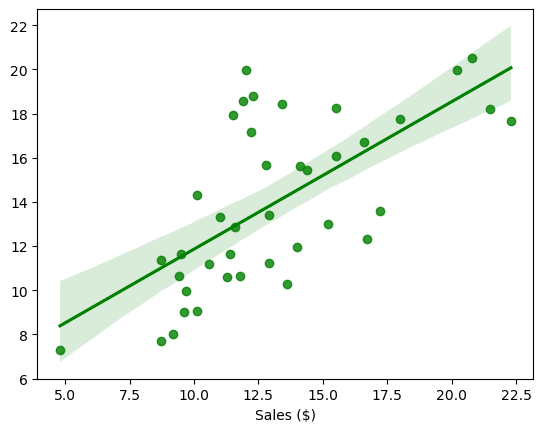

In [84]:
sns.regplot(x=Y_test, y=Y_pred,color='green')

MULTIPLE LINEAR REGRESSION

In [85]:
df.columns

Index(['TV Ad Budget ($)', 'Radio Ad Budget ($)', 'Newspaper Ad Budget ($)',
       'Sales ($)'],
      dtype='object')

In [86]:
x = df[['TV Ad Budget ($)', 'Radio Ad Budget ($)', 'Newspaper Ad Budget ($)']]
y = df['Sales ($)']

from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,train_size=0.8,random_state=15)

In [87]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(160, 3)
(40, 3)
(160,)
(40,)


In [88]:
from sklearn.linear_model import LinearRegression
LR = LinearRegression()
LR.fit(x_train,y_train)

LinearRegression()

In [89]:
print("intercept", LR.intercept_)
print("coefficient", LR.coef_)

intercept 2.6575859171460774
coefficient [0.04681996 0.18857656 0.00145037]


In [90]:
print("The LR model is: Y = ",LR.intercept_, "+", LR.coef_[0], "TV + ", LR.coef_[1], "radio + ", LR.coef_[2], "newspaper")

The LR model is: Y =  2.6575859171460774 + 0.04681995525137475 TV +  0.1885765593185104 radio +  0.0014503705461097471 newspaper


In [91]:
LR.score(x_train,y_train)

0.8935846767022744

In [92]:
y_pred = LR.predict(x_test)
y_pred[:5]

array([ 8.0495603 ,  8.2378216 , 10.4865175 ,  7.39030218,  6.42588974])

In [93]:
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df.head(5)

,Actual,Predicted
49,9.7,8.049560
191,9.9,8.237822
12,9.2,10.486518
172,7.6,7.390302
127,8.8,6.425890


<AxesSubplot:xlabel='Sales ($)'>

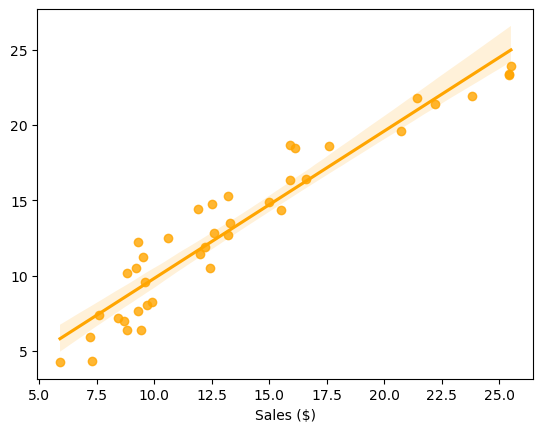

In [94]:
sns.regplot(x=y_test, y=y_pred,color='orange')

MODEL ACCURACY SCORE

In [95]:
from sklearn import metrics
from sklearn.metrics import r2_score

r2 = r2_score(y_test,y_pred) 
mae = metrics.mean_absolute_error(y_test,y_pred)
mse = metrics.mean_squared_error(y_test,y_pred)
rmse = np.sqrt(metrics.mean_squared_error(y_test,y_pred))

In [96]:
print(r2,mae,mse,rmse)

0.9064939179490465 1.4211090121946266 2.7712017668982734 1.6646926944329015


In [97]:
print('r2 =',r2.round(2)*100,'%')

r2 = 91.0 %


In [98]:
print('mae =',mae.round(2)*100,'%')

mae = 142.0 %


In [99]:
print('mse =',mse.round(2)*100,'%')

mse = 277.0 %


In [100]:
print('rmse =',rmse.round(2)*100,'%')

rmse = 166.0 %
